<a href="https://colab.research.google.com/github/Gon-Frecces/ML-zoomcamp/blob/main/course_lead_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/course_lead_scoring.csv')
len(df)

1462

In [4]:
missing_summary = df.isnull().sum()
missing_summary

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('NA')
    else:
        df[col] = df[col].fillna(0.0)

In [6]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [7]:
df['industry'].mode()

,industry
0,retail


In [8]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
0,1,79450.0,4,0.94,1
1,1,46992.0,1,0.80,0
2,5,78796.0,3,0.69,1
3,2,83843.0,1,0.87,0
4,3,85012.0,3,0.62,1
...,...,...,...,...,...
1457,1,0.0,4,0.53,1
1458,3,65259.0,2,0.24,1
1459,1,45688.0,3,0.02,1
1460,5,71016.0,0,0.25,1


In [9]:
corr_matrix = numerical_df.corr()
corr_matrix

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


In [10]:
c1 = corr_matrix.loc["interaction_count", "lead_score"]
c2 = corr_matrix.loc["number_of_courses_viewed", "lead_score"]
c3 = corr_matrix.loc["number_of_courses_viewed", "interaction_count"]
c4 = corr_matrix.loc["annual_income", "interaction_count"]

c1, c2, c3, c4


(np.float64(0.009888182496913131),
 np.float64(-0.004878998354681276),
 np.float64(-0.023565222882888037),
 np.float64(0.02703647240481443))

In [11]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [12]:
X = df.drop(columns=['converted'])
y = df['converted']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)


In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(categorical_cols)

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')


In [14]:
from sklearn.metrics import mutual_info_score

m1 = round(mutual_info_score(y, df['lead_source']), 2)
print('y vs lead_source ', m1)
m2 = round(mutual_info_score(y, df['industry']), 2)
print('y vs industry ', m2)
m3 = round(mutual_info_score(y, df['employment_status']), 2)
print('y vs employment_status ',m3)
m4 = round(mutual_info_score(y, df['location']), 2)
print('y vs location', m4)

y vs lead_source  0.03
y vs industry  0.01
y vs employment_status  0.01
y vs location 0.0


In [15]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = X_train[['lead_source', 'industry', 'employment_status', 'location']].iloc[:].to_dict(orient='records')

In [16]:
dv = DictVectorizer()

In [17]:
X_train = dv.fit_transform(train_dicts)


In [18]:
val_dicts = X_val[['lead_source', 'industry', 'employment_status', 'location']].iloc[:].to_dict(orient='records')

In [19]:
X_val = dv.transform(val_dicts)


In [20]:
test_dicts = X_test[['lead_source', 'industry', 'employment_status', 'location']].iloc[:].to_dict(orient='records')

In [21]:
X_test= dv.transform(test_dicts)


Logistic Regression


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=2000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy:", round(val_accuracy, 2))

Validation Accuracy: 0.61


Model 1 without 'lead_source'

In [24]:
X = df.drop(columns=['converted'])
y = df['converted']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)



train_dicts = X_train[['industry', 'employment_status', 'location']].iloc[:].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
val_dicts = X_val[['industry', 'employment_status', 'location']].iloc[:].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Prediction and accuracy
y_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy:", round(val_accuracy, 2))
print("Difference in accuracy: ", round((0.61 - val_accuracy), 2))

Validation Accuracy: 0.62
Difference in accuracy:  -0.01


Model 2 without 'employment_status'

In [25]:
X = df.drop(columns=['converted'])
y = df['converted']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)



train_dicts = X_train[['lead_source', 'industry', 'location']].iloc[:].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
val_dicts = X_val[['lead_source', 'industry', 'location']].iloc[:].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Prediction and accuracy
y_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy:", round(val_accuracy, 2))
print("Difference in accuracy: ", round((0.61 - val_accuracy), 2))


Validation Accuracy: 0.55
Difference in accuracy:  0.06


Model 3 without 'industry'

In [26]:
X = df.drop(columns=['converted'])
y = df['converted']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)



train_dicts = X_train[['lead_source', 'employment_status', 'location']].iloc[:].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
val_dicts = X_val[['lead_source', 'employment_status', 'location']].iloc[:].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Prediction and accuracy
y_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy:", round(val_accuracy, 2))
print("Difference in accuracy: ", round((0.61 - val_accuracy), 2))


Validation Accuracy: 0.6
Difference in accuracy:  0.01


Best C value


In [27]:
X = df.drop(columns=['converted'])
y = df['converted']

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)


train_dicts = X_train[['lead_source', 'industry', 'employment_status', 'location']].iloc[:].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
val_dicts = X_val[['lead_source', 'industry', 'employment_status', 'location']].iloc[:].to_dict(orient='records')
X_val = dv.transform(val_dicts)



In [28]:
# List of C values to test
C_values = [0.01, 0.1, 1, 10, 100]


results = []

for c in C_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results.append((c, round(acc, 3)))
    print(f"C={c}: Validation Accuracy={round(acc, 3)}")


best_c, best_acc = max(results, key=lambda x: x[1])


C=0.01: Validation Accuracy=0.56
C=0.1: Validation Accuracy=0.601
C=1: Validation Accuracy=0.608
C=10: Validation Accuracy=0.604
C=100: Validation Accuracy=0.604


In [29]:
categorical = list(df_val.select_dtypes(include='object').columns)
numerical = list(df_val.select_dtypes(include=['int64', 'float64']).columns)


val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)

(y_val == churn_decision).mean()

np.float64(0.6040955631399317)

Accuracy



In [30]:
print(len(y_val))
accuracy = (y_val == churn_decision).mean()
(y_val == churn_decision).sum()
print(len(y_val))


293
293


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)


0.6040955631399317

In [32]:
thresholds = np.linspace(0, 1, 21)
# churn_decision = (y_pred >= 0.5)

scores = []
for t in thresholds:
  churn_decison = (y_pred >= t)
  score = accuracy_score(y_val, y_pred >= t)
  print('%.2f %.3f' % (t, score))
  scores.append(score)



0.00 0.556
0.05 0.556
0.10 0.556
0.15 0.556
0.20 0.560
0.25 0.556
0.30 0.570
0.35 0.570
0.40 0.587
0.45 0.601
0.50 0.604
0.55 0.580
0.60 0.567
0.65 0.563
0.70 0.536
0.75 0.563
0.80 0.532
0.85 0.498
0.90 0.454
0.95 0.437
1.00 0.444


Text(0.5, 1.0, 'Accuracy vs Threshold')

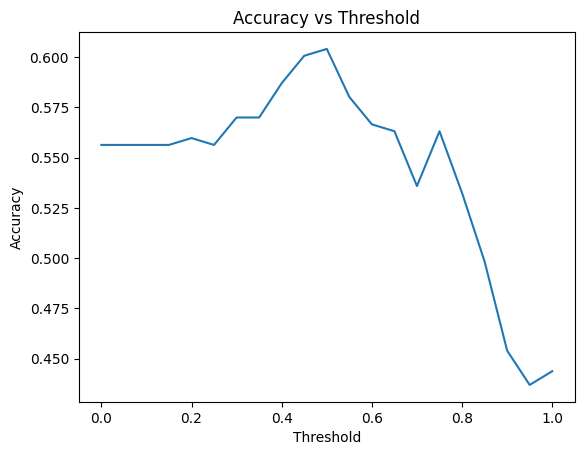

In [33]:
plt.plot(thresholds, scores)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')

Confusion Matrix


In [34]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [35]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [36]:
confusion_mx = np.array([
     [tn, fp],
     [fn, tp]
 ])

confusion_mx

array([[ 51,  79],
       [ 37, 126]])

In [37]:
from sklearn.metrics import confusion_matrix
y_pred_bin = (y_pred >= 0.5)
confusion_mx = confusion_matrix(y_val, y_pred_bin)
print(confusion_mx)

[[ 51  79]
 [ 37 126]]


In [38]:
(confusion_mx/confusion_mx.sum()).round(2)

array([[0.17, 0.27],
       [0.13, 0.43]])

ROC curves


In [39]:
# True positive rate
tpr = tp / (tp + fn)

# False positive rate
fpr = fp / (fp + tn)

In [40]:
scores = []


thresholds = np.linspace(0, 1, 101)

for t in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)


  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  scores.append((t, tp, fp, fn, tn ))

In [41]:
df_scores = pd.DataFrame(scores, columns=['threshold', 'tp', 'fp', 'fn', 'tn'])
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,163,130,0,0
10,0.1,163,130,0,0
20,0.2,163,129,0,1
30,0.3,158,121,5,9
40,0.4,146,104,17,26
50,0.5,126,79,37,51
60,0.6,97,61,66,69
70,0.7,64,37,99,93
80,0.8,36,10,127,120
90,0.9,7,4,156,126


In [42]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

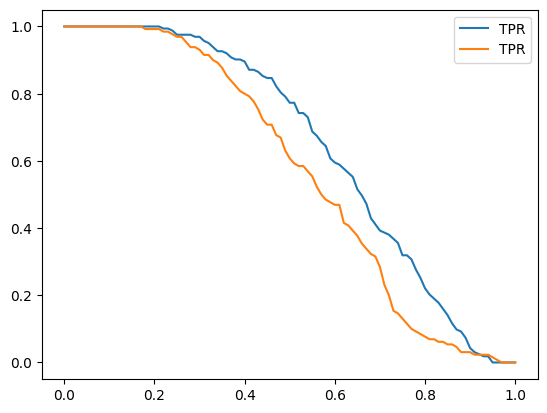

In [43]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='TPR')
plt.legend()

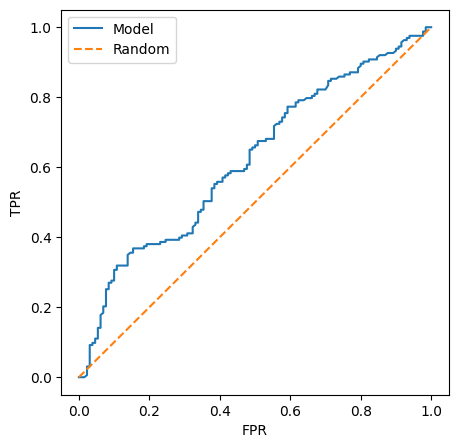

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()


In [45]:
from sklearn.metrics import auc, roc_auc_score
auc(fpr, tpr)

roc_auc_score(y_val, y_pred)

np.float64(0.6189240207645115)

In [46]:
from sklearn.metrics import roc_auc_score
import numpy as np

num_vars = ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']

auc_scores = {}

for col in num_vars:
    auc = roc_auc_score(y_train, df_train[col])

    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])

    auc_scores[col] = auc
    print(f"{col}: {auc:.3f}")

best_var = max(auc_scores, key=auc_scores.get)
print("Highest AUC feature:", best_var)


lead_score: 0.630
number_of_courses_viewed: 0.755
interaction_count: 0.720
annual_income: 0.529
Highest AUC feature: number_of_courses_viewed


K-Fold Cross Validation

In [47]:
def train(df_train, y_train, C=1.0):
  dicts  = df_train[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(C=C, max_iter=2000)
  model.fit(X_train, y_train)

  return dv, model

In [48]:
dv, model = train(df_train, y_train, C=10)

In [49]:
def predict(df, dv, model):
  dicts = df[categorical + numerical].to_dict(orient='records')

  X_val = dv.transform(dicts)
  y_pred = model.predict_proba(X_val)[:, 1]

  return y_pred

In [50]:
y_pred = predict(df_val, dv, model)

In [82]:
!pip install tqdm

In [51]:
from tqdm.auto import tqdm

In [52]:
from sklearn.model_selection import KFold
n_splits = 5

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for C in [0, 0.001, 0.01, 0.5, 1, 5, 10]:
  scores = []

  for train_idx ,val_idx in tqdm(kfold.split(df_full_train), total=n_splits):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

  print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))
len(train_idx), len(val_idx)

  0%|          | 0/5 [00:00<?, ?it/s]

1.000 +- 0.000


  0%|          | 0/5 [00:00<?, ?it/s]

1.000 +- 0.000


  0%|          | 0/5 [00:00<?, ?it/s]

1.000 +- 0.000


  0%|          | 0/5 [00:00<?, ?it/s]

1.000 +- 0.000


  0%|          | 0/5 [00:00<?, ?it/s]

1.000 +- 0.000


  0%|          | 0/5 [00:00<?, ?it/s]

1.000 +- 0.000


  0%|          | 0/5 [00:00<?, ?it/s]

1.000 +- 0.000


(1053, 116)

In [53]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

1.000 +- 0.000


In [54]:
len(df_full_train)

1169

In [55]:
dv, model = train(df_full_train, df_full_train.converted.values, C=1.0)
y_pred = predict(df_test, dv, model)

y_test = df_test.converted.values

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(1.0)

Save the model


In [ ]:
import pickle

output_file = f'model_C={C}.bin'


In [ ]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

Load the Model


In [ ]:
import pickle

model_file = 'model_C=1.0.bin'

In [ ]:
with open(output_file, 'rb') as f_in:
  dv, model = pickle.load(f_in)

In [60]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [ ]:
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)


LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import auc, roc_curve

KFold(n_splits=5, shuffle=True, random_state=1)


KFold(n_splits=5, random_state=1, shuffle=True)